# Lesson 7 Class Exercises: Matplotlib

With these class exercises we learn a few new things.  When new knowledge is introduced you'll see the icon shown on the right: 
<span style="float:right; margin-left:10px; clear:both;">![Task](../media/new_knowledge.png)</span>

## Get Started
Import the Numpy, Pandas, Matplotlib packages and the Jupyter notebook Matplotlib magic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 1. Load and clean the data for plotting

Import the Real Minimum Wages dataset from https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas_panel/realwage.csv

In [2]:
wages=pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas_panel/realwage.csv',
                  delimiter=',')
wages.head()

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17132.443
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18100.918
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17747.406
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18580.139
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18755.832


Clean the data by performing the following:
1. Add a new column containing just the year
2. Drop rows with missing values
3. Keep only rows in the series "In 2015 constant prices at 2015 USD PPPs"
4. Keep only rows where the pay period is 'Annual'
5. Drop unwanted columns: 'Unnamed: 0', 'Time' and 'Series'
6. Rename the 'value' column as 'Salary'
7. Reset the indexes

In [3]:
wages['Year'] = pd.to_datetime(wages['Time']).dt.year


In [4]:
wages.dropna(inplace=True)

In [5]:
wages = wages[(wages['Series'] == 'In 2015 constant prices at 2015 USD PPPs') & (wages['Pay period'] == 'Annual')]

In [6]:
wages['Series'].unique()

array(['In 2015 constant prices at 2015 USD PPPs'], dtype=object)

In [7]:
wages.drop(['Unnamed: 0', 'Time', 'Series'], axis=1, inplace=True)


In [8]:
wages.rename(columns={'value': 'Salary'}, inplace=True)
wages

,Country,Pay period,Salary,Year
0,Ireland,Annual,17132.4430,2006
1,Ireland,Annual,18100.9180,2007
2,Ireland,Annual,17747.4060,2008
3,Ireland,Annual,18580.1390,2009
4,Ireland,Annual,18755.8320,2010
...,...,...,...,...
1329,Colombia,Annual,6983.5298,2015
1330,Colombia,Annual,6950.1768,2016
1372,Costa Rica,Annual,9967.0381,2014
1373,Costa Rica,Annual,10561.5360,2015


In [9]:
wages['Salary'] = wages['Salary'].astype('float')

In [10]:
wages.reset_index(inplace=True, drop=True)

In [12]:
wages.head()

,Country,Pay period,Salary,Year
0,Ireland,Annual,17132.443,2006
1,Ireland,Annual,18100.918,2007
2,Ireland,Annual,17747.406,2008
3,Ireland,Annual,18580.139,2009
4,Ireland,Annual,18755.832,2010


## Exercise 2. Add a quartile group column

Find the quartile to which each row of the `Minimum_Salary` column belongs.  Use the [pd.DataFrame.quantile()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) function to to find the exact quartiles.  Add a new column to the dataframe named `Group` that contains the values `QG1`, `QG2`, `QG3` or `QG4` representeding the quartile group (QG) to which the row belongs. Rows with a value between 0 and the first quartile get the value QG1, rows between the 1st and 2nd quartile get the value QG2, etc.  The resulting table should look like the following:

| Country | Pay period | Minimum_Salary | Year | Group | 
| -- | -- | -- | -- | -- |
| Turkey | Annual | 9379.5137| 2014 | QG2 | 
| Israel | Annual | 11428.6940 | 2006 | QG2 | 
| Colombia | Annual | 6902.3120 | 2013 | QG1 | 
| Turkey | Annual | 8514.1846 | 2009 | QG2 | 
| Costa Rica | Annual | 10859.7470 | 2016 | QG2 | 

Step 1: Find the quartiles for teh `Minimum_Salary` column

In [13]:
q1 = wages['Salary'].quantile(0.25)
q2 = wages['Salary'].quantile(0.5)
q3 = wages['Salary'].quantile(0.75)
q4 = wages['Salary'].quantile(1)
print(q1, q2, q3, q4)

6952.0789 11442.349 16778.677 23401.492


Step 2: Create a new Series object of the correct size that will eventually house our Group categories.  

In [14]:
group = pd.Series(np.zeros(wages.shape[0]))
group

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
330    0.0
331    0.0
332    0.0
333    0.0
334    0.0
Length: 335, dtype: float64

Step 3: Set the quartile groups for series relative to what it should be in the rows of the dataframe, and then add that series to our dataframe.

In [15]:
group[(wages['Salary'] > 0) & (wages['Salary'] <= q1)] = 'QG1'
group[(wages['Salary'] > q1) & (wages['Salary'] <= q2)] = 'QG2'
group[(wages['Salary'] > q2) & (wages['Salary'] <= q3)] = 'QG3'
group[(wages['Salary'] > q3) & (wages['Salary'] <= q4)] = 'QG4'


In [18]:
wages['Group'] = group
wages.sample(5)

,Country,Pay period,Salary,Year,Group
272,Belgium,Annual,21709.3260,2014,QG4
172,Estonia,Annual,6368.1611,2013,QG1
98,Greece,Annual,11492.0880,2016,QG3
139,United States,Annual,15342.8140,2013,QG3
104,Slovak Republic,Annual,7316.3691,2011,QG2


## Exercise 3. Create a boxplot

Create a graph using a single axis that shows the boxplots of the four groups. You can use the [matplotlib.axes.Axes.boxplot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html) function to do this.  This will allow us to see if we properly separated rows by quartiles. It will also allow us to see the spread of the data in each quartile. Be sure to lable the x-axis tick marks with the proper quantile group name.

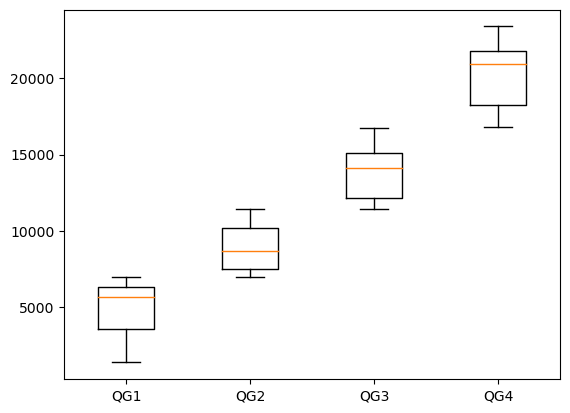

In [19]:
group1 = wages[(wages['Group'] == "QG1")]
group2 = wages[(wages['Group'] == "QG2")]
group3 = wages[(wages['Group'] == "QG3")]
group4 = wages[(wages['Group'] == "QG4")]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot = ax.boxplot([group1['Salary'], group2['Salary'], 
                   group3['Salary'], group4['Salary']], 
                  labels=['QG1', 'QG2','QG3', 'QG4'])

In [22]:
wages_pivoted = wages.pivot(index=['Country', 'Pay period', 'Year'], columns='Group', values='Salary')

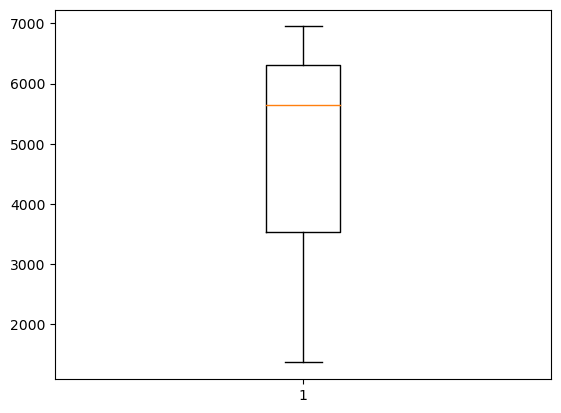

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot = ax.boxplot([wages_pivoted['QG1'].dropna()
                  ])

## Exercise 4. Create a Scatterplot

Create a single scatterplot to explore if the salaries in quartile group 1 and quartile group 4 are correlated.

Step 1: Transform the data such that each quantile group is a separate column with an index of `Year`.

In [29]:
wages_pivoted = wages.pivot_table(index='Year', columns='Group', values='Salary')
wages_pivoted.head()

Group,QG1,QG2,QG3,QG4
Year,,,,
2006,4208.389667,9084.260487,13867.088857,20200.330167
2007,4651.623600,8873.956486,13510.760143,20159.925143
2008,4892.017878,8674.308617,13055.958571,19679.588500
2009,5226.910111,8473.798340,13432.655875,20195.574250
2010,5189.651400,9051.236433,14145.648857,20104.523750


Step 2: Now generate the plot

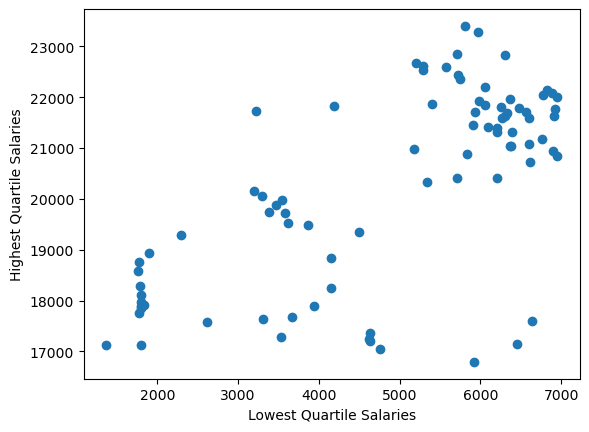

In [33]:
group1 = wages[(wages['Group'] == "QG1")]
#group2 = wages[(wages['Group'] == "QG2")]
#group3 = wages[(wages['Group'] == "QG3")]
group4 = wages[(wages['Group'] == "QG4")]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.axes.set_xlabel('Lowest Quartile Salaries')
ax.axes.set_ylabel('Highest Quartile Salaries')
ax.scatter(group1['Salary'], group4['Salary'])
plt.show()


Recreate the plot above, but set a different color per year and size the points to be larger for later years and smaller for earlier years.

Step 1:  Create Numpy arrays to represent the colors and sizes for each point of data. 

In [41]:
colors = np.arange(10, 120, 10)
sizes = np.arange(10, 120, 10)



Step 2: Create the figure

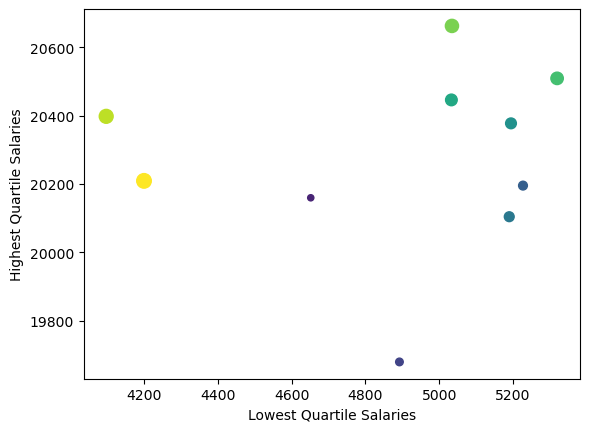

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.axes.set_xlabel('Lowest Quartile Salaries')
ax.axes.set_ylabel('Highest Quartile Salaries')
ax.scatter(wages_pivoted['QG1'], wages_pivoted['QG4'], c=colors, s=sizes)
plt.show()

## Exercise 5. Create a grid of scatterplots

Now, let's see the pairwise scatterplot of each quartile group with every other group.  Create a 4x4 grid of subplots. The rows and columns of the subplot represent one of the 4 groups and each plot represents the scatterplot of those groups.  The plot should look similar to the following:

<img src="media/D08-multiplot.png" width="75%">


To ensure that the plot is not too small to read we can force a larger size of 15 inches by 15 inches with the following:

```python
plt.rcParams["figure.figsize"] = (15, 15)
```

Also, the x-axis and y-axis labels do not need to be repeated, we only need to set them on the first column and last rows.  You can set the y-axis labels on the first column by using the `set` function of the Axes function and providing the `ylabel` argument. For example.
```python
axes[0, 0].set(ylabel="QG1")
```

You can do the same for the x-axis on the bottom row using the same style:
```python
axes[3, 0].set(xlabel="QG1")
```

**Hint**: You will need to repeat a lot of code.  Cut-and-paste is your friend!  

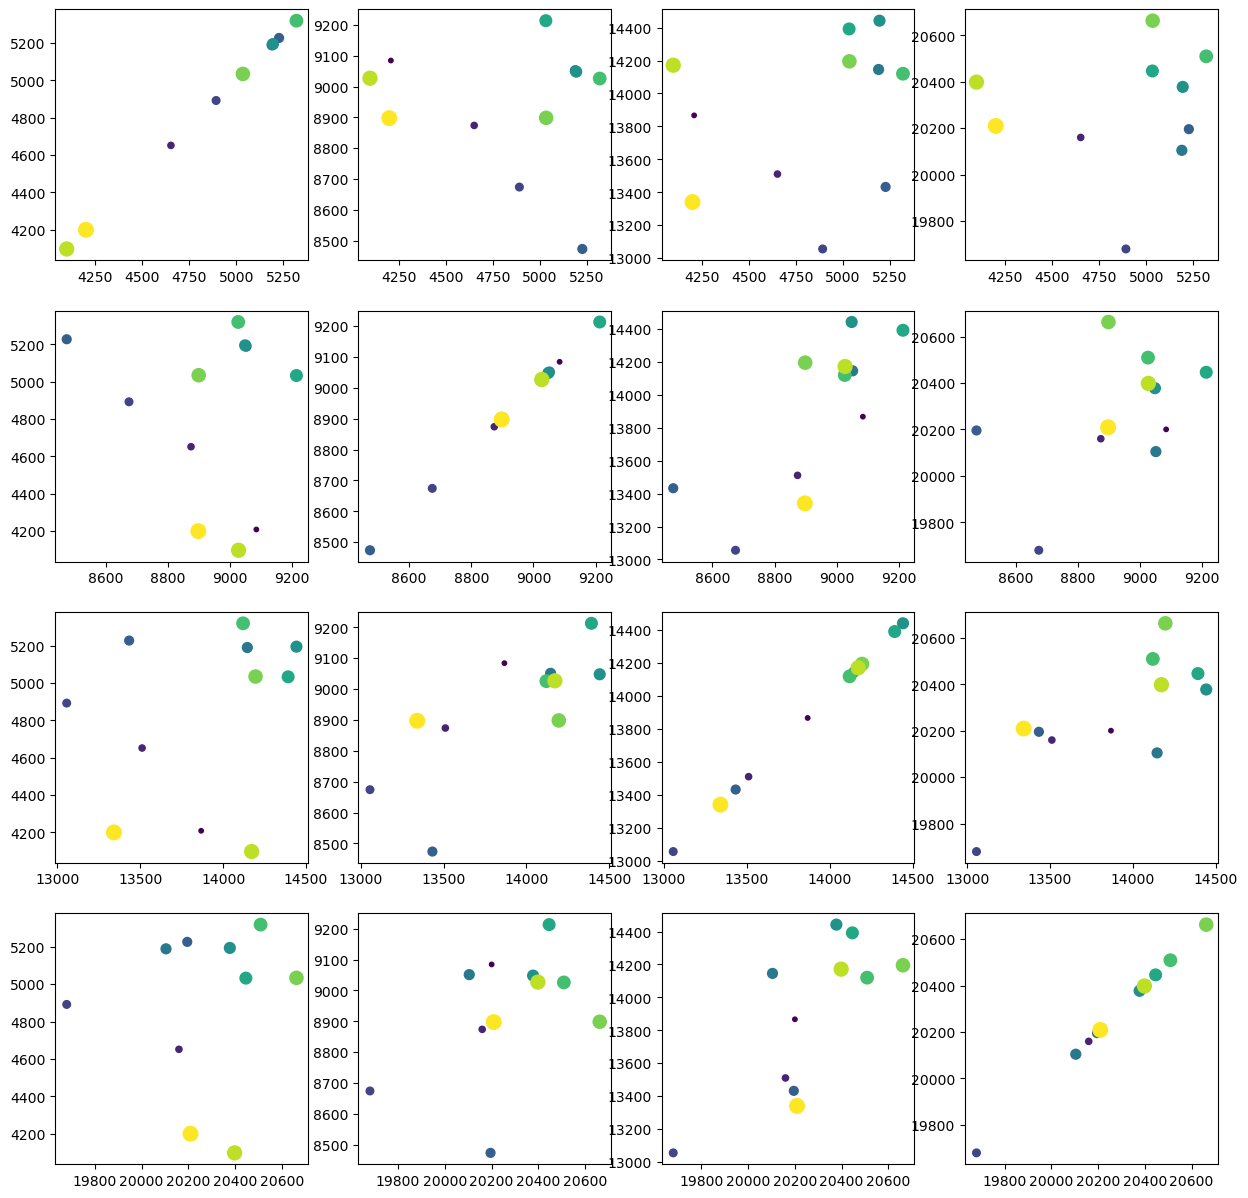

In [58]:
# Create the figure and 4 x 4 set of axes.
plt.rcParams["figure.figsize"] = (15, 15)
fig = plt.figure()
ax = fig.subplots(4, 4)

# Add the first row of scatterplots
ax[0, 0].scatter(wages_pivoted['QG1'], wages_pivoted['QG1'], c=colors, s=sizes)
ax[0, 1].scatter(wages_pivoted['QG1'], wages_pivoted['QG2'], c=colors, s=sizes)
ax[0, 2].scatter(wages_pivoted['QG1'], wages_pivoted['QG3'], c=colors, s=sizes)
ax[0, 3].scatter(wages_pivoted['QG1'], wages_pivoted['QG4'], c=colors, s=sizes)

# Add the second row of scatterplots
ax[1, 0].scatter(wages_pivoted['QG2'], wages_pivoted['QG1'], c=colors, s=sizes)
ax[1, 1].scatter(wages_pivoted['QG2'], wages_pivoted['QG2'], c=colors, s=sizes)
ax[1, 2].scatter(wages_pivoted['QG2'], wages_pivoted['QG3'], c=colors, s=sizes)
ax[1, 3].scatter(wages_pivoted['QG2'], wages_pivoted['QG4'], c=colors, s=sizes)
# Add the third row of scatterplots
ax[2, 0].scatter(wages_pivoted['QG3'], wages_pivoted['QG1'], c=colors, s=sizes)
ax[2, 1].scatter(wages_pivoted['QG3'], wages_pivoted['QG2'], c=colors, s=sizes)
ax[2, 2].scatter(wages_pivoted['QG3'], wages_pivoted['QG3'], c=colors, s=sizes)
ax[2, 3].scatter(wages_pivoted['QG3'], wages_pivoted['QG4'], c=colors, s=sizes)
# Add the fourth row of scatterplots
ax[3, 0].scatter(wages_pivoted['QG4'], wages_pivoted['QG1'], c=colors, s=sizes)
ax[3, 1].scatter(wages_pivoted['QG4'], wages_pivoted['QG2'], c=colors, s=sizes)
ax[3, 2].scatter(wages_pivoted['QG4'], wages_pivoted['QG3'], c=colors, s=sizes)
ax[3, 3].scatter(wages_pivoted['QG4'], wages_pivoted['QG4'], c=colors, s=sizes)
# Set the x-axis lables only on the left-most plots

# Set the y-axis labels only on the bottom plots.

# Show the plot


## Exercise 6. Create a grid of line plots
Now, let's create a line graph of changes over time for each quartile group.  Let's use a 2x2 subplot grid with each grid showing a different group.


<img src="media/D08-lineplot.png" width="50%">